# Titanic Data set
From Kaggle Titanic - ML from Disaster competition

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn import metrics


Data dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd


sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Import and characterize dataset

In [3]:
# import the training and testing data set

filename = 'train.csv'

train_df = pd.read_csv(filename)

filename2 = 'test.csv'

test_df = pd.read_csv(filename2)


In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.shape

(891, 12)

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# What are the data types
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
# How many of each column are missing
# get names of columsn with missing values

cols_with_missing = [col for col in train_df.columns
                    if train_df[col].isnull().any()]

print('Columns with missing values: ', cols_with_missing)

for x in cols_with_missing:
    print(x, ':', train_df[x].isna().sum())

Columns with missing values:  ['Age', 'Cabin', 'Embarked']
Age : 177
Cabin : 687
Embarked : 2


# Explore basic percentages and visuallization of datset

In [7]:
# look at some simple percentages first

women = train_df.loc[train_df.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

print('% of women who survived:', rate_women)

% of women who survived: 0.7420382165605095


In [8]:
men = train_df.loc[train_df.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print('% of men who survived:', rate_men)

% of men who survived: 0.18890814558058924


In [9]:
# check embarked location: C, Q, S

C_status = train_df.loc[train_df.Embarked == 'C']['Survived']
rate_C = sum(C_status)/len(C_status)

Q_status = train_df.loc[train_df.Embarked == 'Q']['Survived']
rate_Q = sum(Q_status)/len(Q_status)

S_status = train_df.loc[train_df.Embarked == 'S']['Survived']
rate_S = sum(S_status)/len(S_status)

print('% from C who survived:', rate_C)
print('% from Q who survived:', rate_Q)
print('% from S who survived:', rate_S)



% from C who survived: 0.5535714285714286
% from Q who survived: 0.38961038961038963
% from S who survived: 0.33695652173913043


In [10]:
# check P class: 1, 2, 3

status1 = train_df.loc[train_df.Pclass == 1]['Survived']
rate_1 = sum(status1)/len(status1)

    
status2 = train_df.loc[train_df.Pclass == 2]['Survived']
rate_2 = sum(status2)/len(status2)

status3 = train_df.loc[train_df.Pclass == 3]['Survived']
rate_3 = sum(status3)/len(status3)

print('% from 1 who survived:', rate_1)
print('% from 2 who survived:', rate_2)
print('% from 3 who survived:', rate_3)

% from 1 who survived: 0.6296296296296297
% from 2 who survived: 0.47282608695652173
% from 3 who survived: 0.24236252545824846


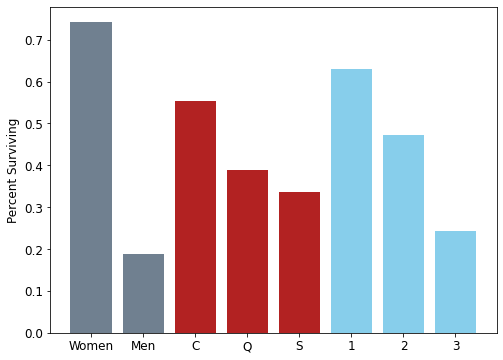

In [11]:
# Plot some percentages

labels = ['Women', 'Men', 'C', 'Q', 'S', '1', '2', '3']
percentages = [rate_women, rate_men, rate_C, rate_Q, rate_S, rate_1, rate_2, rate_3]
bar_color = ['slategray', 'slategray', 'firebrick', 'firebrick', 'firebrick', 'skyblue', 'skyblue', 'skyblue']

plt.figure(figsize=(8,6))
plt.bar(labels,percentages,color = bar_color)
plt.ylabel('Percent Surviving',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Break into training and validation data and run fandom forest classifier

In [15]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [53]:
# Break training data into testing and training sets so we can test a random forest classifier

# The columns we care about are Pclass[2], Sec[4], Age[5], SibSp[6], Parch[7], Fare[8], Embarked[10]

# target we are looking for is 'Survived'
y = train_df.Survived

####
# Age column is throwing nans, need to sort out why
# Column with missing data
# Age 177
# Cabin 687
# Embarked 2
####

# features = ['Pclass', 'Sex', 'SibSp', 'Age', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
# this is all of the features

features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age']
#X = pd.get_dummies(train_df[features])
X = train_df[features]
#X_test = pd.get_dummies(test_df[features])


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 1)


# Apply ordinal encoder to each column with categorical data
#object_cols = ['Sex', 'Embarked'] #select the categorical columns
#ordinal_encoder = OrdinalEncoder()
#label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
#label_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])

#apply one-hot encoder to each column with categorical data
object_cols = ['Sex', 'Embarked'] #select the categorical columns
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
oh_cols_train = pd.DataFrame(oh_encoder.fit_transform(X_train[object_cols]))
oh_cols_valid = pd.DataFrame(oh_encoder.transform(X_valid[object_cols]))

# one hot encoding removed the index, put it back
oh_cols_train.index = X_train.index
oh_cols_valid.index = X_valid.index

# remove categorical colums (will replace with oh encoding)
num_X_train = X_train.drop(object_cols, axis = 1)
num_X_valid = X_valid.drop(object_cols, axis = 1)

# add oh encoded columns to numerical features
oh_X_train = pd.concat([num_X_train, oh_cols_train], axis = 1)
oh_X_valid = pd.concat([num_X_valid, oh_cols_valid], axis = 1)


#Impute any missing values
# imputation
my_imputer = SimpleImputer(strategy='most_frequent')
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(oh_X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(oh_X_valid))

# imputation removed column names; put them back
imputed_X_train.columns = oh_X_train.columns
imputed_X_valid.columns = oh_X_valid.columns



In [54]:
#print(X_train[X_train.isnull().any(axis=1)])
print(imputed_X_train.head())

   Pclass  SibSp  Parch     Fare   Age    0    1    2    3    4    5
0     3.0    2.0    0.0  23.2500  24.0  0.0  1.0  0.0  1.0  0.0  0.0
1     1.0    0.0    0.0  56.9292  30.0  1.0  0.0  1.0  0.0  0.0  0.0
2     2.0    0.0    0.0  10.5000  34.0  1.0  0.0  0.0  0.0  1.0  0.0
3     2.0    2.0    0.0  73.5000  21.0  0.0  1.0  0.0  0.0  1.0  0.0
4     2.0    0.0    0.0  10.5000  62.0  0.0  1.0  0.0  0.0  1.0  0.0


In [24]:
# Run a decision tree regressor
# Build the model

# define the model. 
titanic_model = DecisionTreeRegressor(random_state = 19)

# fit model
titanic_model.fit(imputed_X_train, y_train)

DecisionTreeRegressor(random_state=19)

In [55]:
# Run a random forest classifier

model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=1)
model.fit(imputed_X_train,y_train)
predictions = model.predict(imputed_X_valid)

In [56]:
# check these predictions
# have 891 rows for people on boat
# test size is 20 percent, or 178

print(metrics.accuracy_score(y_valid, predictions))

#print(metrics.classification_report(Y_validation, predictions))
print(metrics.confusion_matrix(y_valid , predictions))
print(metrics.f1_score(y_valid , predictions))


0.8044692737430168
[[96 10]
 [25 48]]
0.732824427480916


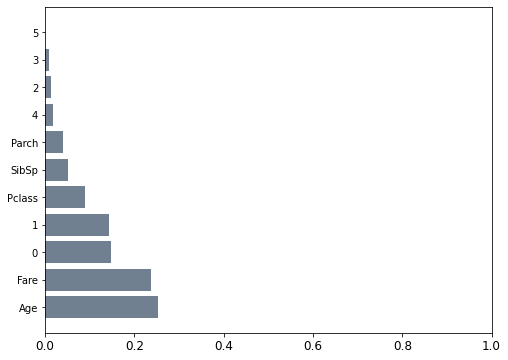

In [57]:
# visualize the importance of different features
feature_imp = pd.Series(model.feature_importances_,index=imputed_X_train.columns).sort_values(ascending=False)

#print(feature_imp[:])
#print(feature_imp.index.map(str))

plt.figure(figsize=(8,6))
plt.barh(feature_imp.index.map(str),feature_imp[:],color = 'slategray', align='center')
plt.xlim((0,1))
plt.xticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [ ]:
# set up a pipeline to run this automatically

In [59]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

In [75]:
# preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='most_frequent')

# preprocessing for categorical data
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [93]:
# define the model

model = RandomForestClassifier(n_estimators=350, max_depth=8, random_state=1)

In [94]:
# bundle preprocessing and moedling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# preprocessing of training data, fit mode
my_pipeline.fit(X_train, y_train)

# preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)


print(metrics.accuracy_score(y_valid, preds))


0.7932960893854749


In [86]:
# define a function so we can determine the best number of estimators
def get_score(n_estimators):
    
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', RandomForestClassifier(n_estimators= 350, max_depth= n_estimators,
                                                             random_state=1))])
    
    score = cross_val_score(my_pipeline, X_train, y_train,
                           cv = 3,
                           scoring= 'accuracy')
    
    return(score.mean())

In [91]:
results = {}
for i in range(1,12):
    results[i] = get_score(i)
    
# 350 is a good number of estimators
# 8 is a good max_depth

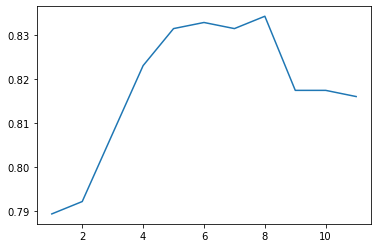

In [92]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()